In [1]:
## Import relevant packages
import numpy as np
import matplotlib.pyplot as plt
import pyOptimalEstimation as pyOE
import os
import sys
import re
import scipy.stats as stats
import seaborn as sns

## append paths
sys.path.append('C:/Users/Ida Olsen/Documents/Speciale_2022/scripts')
parrent_dir = "C:\\Users\\Ida Olsen\\Documents\\Speciale_2022"
sys.path.append(parrent_dir + '\\smrt')
sys.path.append(parrent_dir + '\\Ida_passive_SMRT\\Ida_passive_SMRT\\Code')

## Import SMRT packages
from smrt.permittivity.saline_snow import saline_snow_permittivity_scharien_with_stogryn95 as ssp
from smrt import make_ice_column, make_interface, make_snowpack, sensor_list
from smrt.core.globalconstants import PSU
from smrt import make_model
from smrt.interface.iem_fung92_brogioni10 import IEM_Fung92_Briogoni10
from smrt import SMRTError
from IPython.display import clear_output

## self made modules
from Snowpit_class import Snowpit_info
from roughness import roughness
from Make_plots import plot_freq
from forward_functions import forward_mean, forward_OIB
from prepare_inputs_OE import prepare_inputs, prepare_inputs_FYI
import prepare_inputs_OE as piO

0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.278529277237716
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.2909712116912257
0.290

In [30]:
def corrMat(self, data):
    ## Make correlation matrix - input covariance matrix
    corrMat = np.zeros(data.shape)
    sigmas = np.diag(data)**(1/2)
    rows = range(data.shape[0])
    cols = range(data.shape[1])
    for row in rows:
        sigma1 = sigmas[row]
        for col in cols:
            sigma2 = sigmas[col]

            corrMat[row][col] = np.array(data)[row][col]/(sigma1*sigma2)

    fig, ax = plt.subplots(figsize=(9, 6))
    im = ax.imshow(corrMat, cmap="inferno")

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(data.keys())), labels=data.keys())
    ax.set_yticks(np.arange(len(data.keys())), labels=data.keys())

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")


    # Loop over data dimensions and create text annotations.
    for i in range(len(data.keys())):
        for j in range(len(data.keys())):
            if np.round(corrMat[i, j],2) > 0.5:
                text = ax.text(j, i, np.round(corrMat[i, j],2),
                       ha="center", va="center", color="k")
            else:
                text = ax.text(j, i, np.round(corrMat[i, j],2),
                               ha="center", va="center", color="w")

    ax.set_title(r'Posterior state correlation matrix')
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)


    fig.tight_layout()
    plt.savefig(savepath + 'CorrOut.png' )
    plt.show()
    
def covMat(self, data, title):
    for var in self.x_vars:
        print(var)
        data[var][var] = data[var][var]**(1/2)
    ## get std
    try:
       data['lex']['lex'] = data['lex']['lex']*1e1
    except:
        pass
    try:
        data['sal']['sal'] = data['sal']['sal']*1e1
    except:
        pass
    try:
        data['Tsur']['Tsur'] = data['Tsur']['Tsur']/1e2
    except:
        pass
    try:
        data['rho']['rho'] = data['rho']['rho']/1e2
    except:
        pass
    try:
        data['slope']['slope'] = data['slope']['slope']/1e2
        # data.x_vars[-1] = 'Snow/ice roughness'
    except:
        pass
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(
        data*1e2,
        annot=True, 
        fmt='.2f', 
        ax=ax, 
        linewidths=.05, 
        cbar_kws={'label':'Modified Covariance [cm,mm,PSU,kg/m3,K,cm,'']'}
    )
    ax.set_title(title)
    if 'out' in title:
        plt.savefig(savepath + 'CovOut.png' )
    else:
        plt.savefig(savepath + 'CovIn.png' )
    plt.show()
def makeOEobject(x_vars, x_ap, x_cov, y_vars, y_obs, y_cov, forward_OIB):
    nl_snow = 2
    x_vars = list(x_upperLimit.keys())
    forwardKwArgs = {"variables": x_vars, "nl_snow": nl_snow, "n": 0, "pol":polarization
                     , "nls":1, "avg":True, "sim":True}
    oe = pyOE.optimalEstimation(
    x_vars, x_ap, x_cov, y_vars, y_obs, y_cov, forward_OIB
    ,forwardKwArgs=forwardKwArgs
    ,x_lowerLimit=x_lowerLimit
    ,x_upperLimit=x_upperLimit
    )
    return oe
def calc_ang(var1, var2):
    
    text_file = open(savepath + "angles_jacobian.txt", "a")
    
    J = oe.getJacobian(oe.x_op, oe.y_op)[0]
    print('--------------------------------------------------')
    text_file.write('--------------------------------------------------\n')
    
    denominator = np.linalg.norm(J['perturbed '+var1][:5])*np.linalg.norm(J['perturbed '+var2][:5])
    nominator = np.dot(J['perturbed '+var1][:5], J['perturbed '+var2][:5])
    print('Angle between '+var1+' and '+var2+' vector V:', np.round(np.rad2deg(np.arccos(nominator/denominator)),2))
    text_file.write('Angle between '+var1+' and '+var2+' vector V:' + str(np.round(np.rad2deg(np.arccos(nominator/denominator)),2)) + '\n')

    
    denominator = np.linalg.norm(J['perturbed '+var1][5:])*np.linalg.norm(J['perturbed '+var2][5:])
    nominator = np.dot(J['perturbed '+var1][5:], J['perturbed '+var2][5:])
    print('Angle between '+var1+' and '+var2+ ' vector H:', np.round(np.rad2deg(np.arccos(nominator/denominator)),2))
    text_file.write('Angle between '+var1+' and '+var2+' vector H:' + str(np.round(np.rad2deg(np.arccos(nominator/denominator)),2)) + '\n')
def covOutMat(oe1, oe2):
    data=oe1/oe2
    f, ax = plt.subplots(figsize=(7, 7))
    sns.heatmap(
        data,
        cmap="rocket_r",
        annot=True, 
        fmt='.2f', 
        ax=ax, 
        linewidths=.08,
        cbar=False,
        cbar_kws={"shrink": 0.5, 'label':'Ratio of covariance compared to input'}
    )
    ax.set_title('$\mathbf{S}_{op}$/$\mathbf{S}_{a}$ posterior to prior state covariance matrix')
    plt.savefig(savepath + 'CovRatioOuttoIn.png' )
    plt.show()

In [31]:
FYI_data = piO.OIB_data('FYI', new=False)

FYI_OIB_SIM = np.concatenate([np.mean(FYI_data.TbV_sim, axis=0), np.mean(FYI_data.TbH_sim, axis=0)])
FYI_OIB_AMSR = np.concatenate([np.mean(FYI_data.TbV_AMSR_all, axis=0), np.mean(FYI_data.TbH_AMSR_all, axis=0)])

FYI_OIB_AMSR_std = np.concatenate([np.std(FYI_data.TbV_AMSR_all, axis=0), np.std(FYI_data.TbH_AMSR_all, axis=0)])

## Make simulated data with noise
FYI_OIB_SIM_gaussian = FYI_OIB_SIM

In [32]:
np.mean(FYI_data.sit)


1.4398281690140846

### Choose looking at only V or at both

### Choose how many input variables 

### choose Sy sensitivity

In [33]:
# Saving location
# savepath = 'C:/Users/Ida Olsen/Documents/Speciale_2022/Results/Linear_tests' + '/Only V/Sy_test/SD_lex_sal_sit/'
#'SD_sit/small_y/'

# Polarization (V or both)
polarization = 'both'
# sensitivity of TBs (std)
V_sens = 0.3 # K
H_sens = 0.3 # K
# List with input variables
input_variables = ["SD","lex","sal","rho","Tsur", "SIT", "slope"]
x_vars=input_variables
## list with true values
x_truth = [np.mean(FYI_data.sd, axis=0)[0],
           np.mean(FYI_data.sd_lex, axis=0)[0],
           np.mean(FYI_data.sd_sal, axis=0)[0],
           np.mean(FYI_data.sd_rho, axis=0)[0],
           np.mean(FYI_data.skt),
           np.mean(FYI_data.sit),
           np.mean(FYI_data.OIB_surf_rough)]

# np.cov(FYI_data.sd, FYI_data.sd_lex, FYI_data.sd_sal, FYI_data.sd_rho)

#x_cov = [[] for var in input_variables]
sd = [sd[0] for sd in FYI_data.sd]
lex = [sd_lex[0] for sd_lex in FYI_data.sd_lex]
sal = [sd_sal[1] for sd_sal in FYI_data.sd_sal]
rho = [sd_rho[1] for sd_rho in FYI_data.sd_rho]
skt = [skt for skt in FYI_data.skt]
sit = [skt for skt in FYI_data.sit]
slope = [0.08 for skt in FYI_data.skt]
# print(np.cov(x_cov))

X = np.stack((sd, lex, sit, slope), axis=0)
#x_cov = np.cov(X)
#x_cov[-1,-1] = 0.01

In [34]:
## Define name of y-variables
if polarization=='both':
    y_vars = ["6V", "10V", "18V", "23V", "36V", "6H", "10H", "18H", "23H", "36H"]
    y_obs  = FYI_OIB_SIM_gaussian
    # y_cov = np.diag([V_sens**2]*5 + [H_sens**2]*5)
    y_cov = np.diag(np.array([0.3, 0.3, 0.6, 1.1, 1.1] + [0.3, 0.3, 0.6, 1.1, 1.1])**2)
    # y_cov = np.diag(np.array([0.1, 0.1, 0.1, 0.1, 0.1] + [0.1, 0.1, 0.1, 0.1, 0.1])**2)
elif polarization=='V':
    y_vars = ["6V", "10V", "18V", "23V", "36V"]
    y_obs = np.mean(FYI_data.TbV_sim, axis=0)
    y_cov = np.diag([V_sens**2]*5)
    y_cov = np.diag(np.array([0.3, 0.3, 0.6, 1.1, 1.1]))

# Define name of x-variable
x_vars = input_variables
## prepare first guess, covariance matrix, upper and lower limits
[x_ap, x_cov, x_lowerLimit, x_upperLimit, x_info] = prepare_inputs_FYI(FYI_data, x_vars, logarithmic=False, sim=True, nls=1)

print(x_ap)
print('Guess in linear units', np.round(x_ap,2)[:3])

[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.00014014]
[1.05673239e-01 1.40136468e-04 8.67319838e-03 3.37518190e+02
 2.53083775e+02 1.43982817e+00 1.90000000e-01]
Guess in linear units [0.11 0.   0.01]


Text(0.5, 1.0, 'Measurement uncertainty $\\mathbf{S}_{y}$')

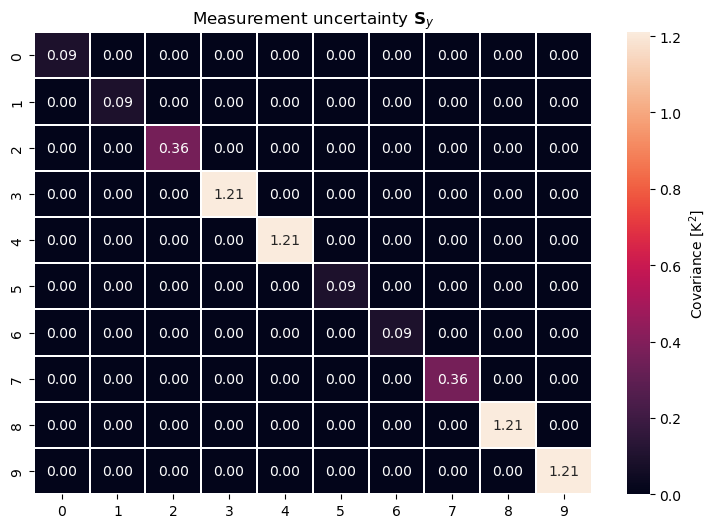

In [35]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    y_cov, 
    annot=True, 
    fmt='.2f', 
    ax=ax, 
    linewidths=.05, 
    cbar_kws={'label':'Covariance [K$^2$]'}
)
ax.set_title(r'Measurement uncertainty $\mathbf{S}_{y}$')

In [37]:
[x_ap, x_cov, x_lowerLimit, x_upperLimit, x_info] = prepare_inputs_FYI(FYI_data,x_vars, logarithmic=False, sim=True, nls=1)
#print(x_cov)
#diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, (0.028e-3)**2, (0.2637e-3)**2,
#        (319.15e-2)**2, np.std(FYI_data.skt)**2, np.std(FYI_data.sit)**2,(0.005)**2]


diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, (2*np.std(FYI_data.sd_lex, axis=0)[0])**2,
        (np.sum(np.std(FYI_data.sd_sal, axis=0)))**2,(np.std(FYI_data.sd_rho, axis=0)[1])**2,
        np.std(FYI_data.skt)**2, np.std(FYI_data.sit)**2,(0.03)**2]

#diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, (np.std(FYI_data.sd_lex, axis=0)[0])**2,
#        (np.sum(np.std(FYI_data.sd_sal, axis=0)))**2,(np.std(FYI_data.sd_rho, axis=0)[1])**2,
#        np.std(FYI_data.sit)**2,(0.005)**2]

#diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, (np.std(FYI_data.sd_lex, axis=0)[0])**2,
#        np.std(FYI_data.sit)**2,(0.005)**2]

#diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, np.std(FYI_data.sit)**2]

#x_cov = np.diag(diag)
#print(x_cov)
#x_cov[-1,-1] = 0.01
#diag = np.diag(x_cov)
print(Snowpit_info.sd)

x_cov = np.diag(diag)
x_ap[-1]=0.08
#x_cov = np.cov(X)
# x_cov[-1,-1] = 0.01
# diag = [(4.8e-2)**2, (30.0e-2)**2]

try:
    float(x_cov)
    x_cov= np.array([[x_cov]])
except:
    pass
#x_vars[-1]='Snow/ice roughness'
#print(x_vars)
oe_show = makeOEobject(x_vars, x_ap, x_cov, y_vars, y_obs, y_cov, forward_OIB)
title = r'Prior state modified covariance matrix $\mathbf{S}_{a}$'
covMat(oe_show, oe_show.S_a, title)

print(x_ap)

[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.00014014]


AttributeError: type object 'Snowpit_info' has no attribute 'sd'

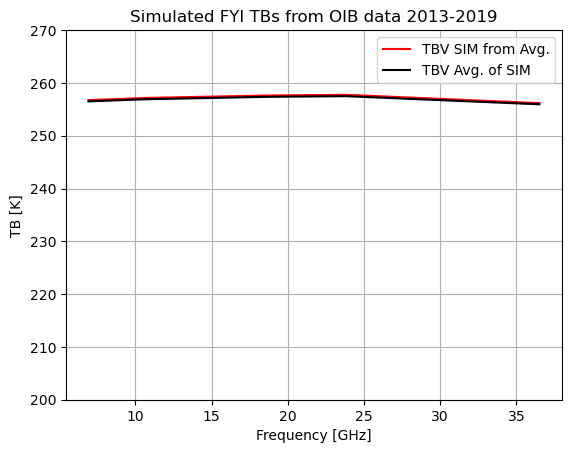

In [29]:
## Plots results
#plt.figure(figsize=(8,6))
frequencies=[6.925e9,10.65e9,18.7e9,23.8e9,36.5e9];
freqs = [f*1e-9 for f in frequencies]

data = forward_OIB(X=x_ap,self=FYI_data,variables=x_vars, nl_snow = 2, n=0, pol=polarization,
                   logarithmic=False, nls=1, avg=True, sim=True)

y = data[:5]
plt.plot(freqs, y, c='r',label = 'TBV SIM from Avg.')
#y = data[5:]
#plt.plot(freqs,y, c='b', label = 'TBH SIM from Avg.')
y = FYI_OIB_SIM[:5]
plt.plot(freqs, y, c='k', label = 'TBV Avg. of SIM')
#y = FYI_OIB_SIM[5:]
#plt.plot(freqs, y, c='green', label = 'TBH Avg. of SIM')
plt.grid()
plt.ylim([200,270])
plt.legend()
plt.xlabel('Frequency [GHz]')
plt.ylabel('TB [K]')
plt.title('Simulated FYI TBs from OIB data 2013-2019')
# plt.savefig(os.path.join(self.pp, 'OE_figures/Simulated_data.png'), bbox_inches='tight')
plt.show()

['SD', 'lex', 'SIT', 'slope']
[1.05673239e-01 1.40136468e-04 1.43982817e+00 8.00000000e-02]
[[2.29149323e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.13516887e-12 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.21549141e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.50000000e-05]]
1.08 s, iteration 1, degrees of freedom: 0.98 of 4, converged (x-space):  0.000
1.59 s, iteration 2, degrees of freedom: 0.98 of 4, done.  0.000
-----------------
TRUE VALUES
-----------------
SD:  [0.10567324 0.03      ]
lex:  [0.14013647 0.16445789]
sal:  [0.88802032 8.67319838]
SIT:  1.4398281690140846
-----------------
SD       0.099834
lex      0.000140
SIT      1.460114
slope    0.080025
dtype: float64
SD    9.983431
dtype: float64
lex       0.140138
SIT    1460.113955
dtype: float64
-----------------
Jacobian matrix:
      perturbed SD  perturbed lex  perturbed SIT  perturbed slope
6V      31.394339     -20.567220      -2.697802       -19.6

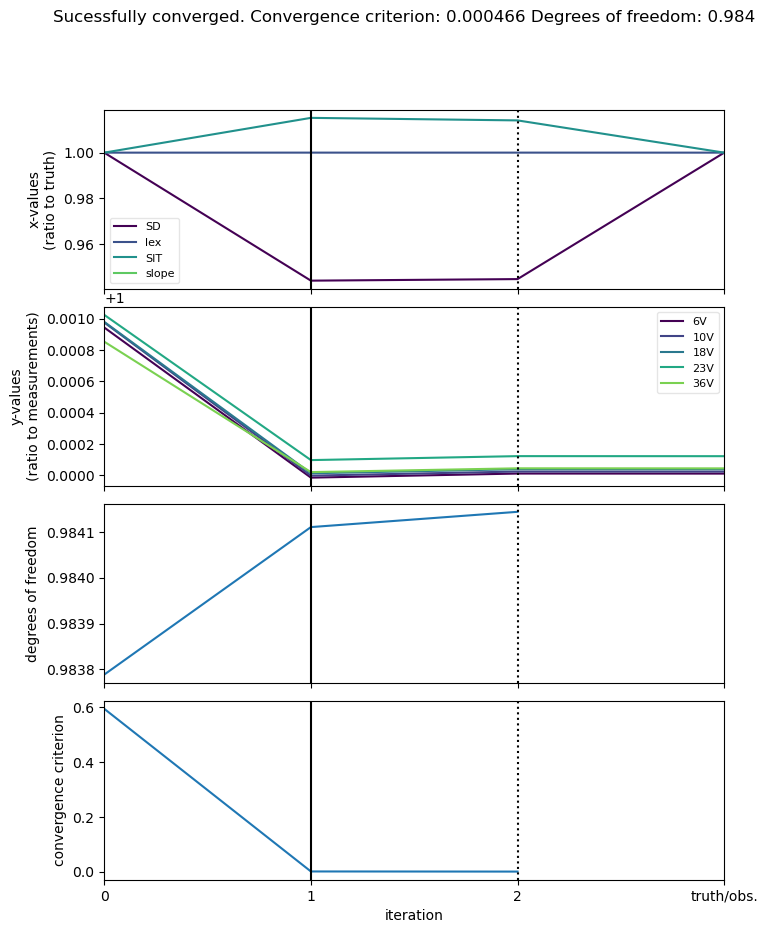

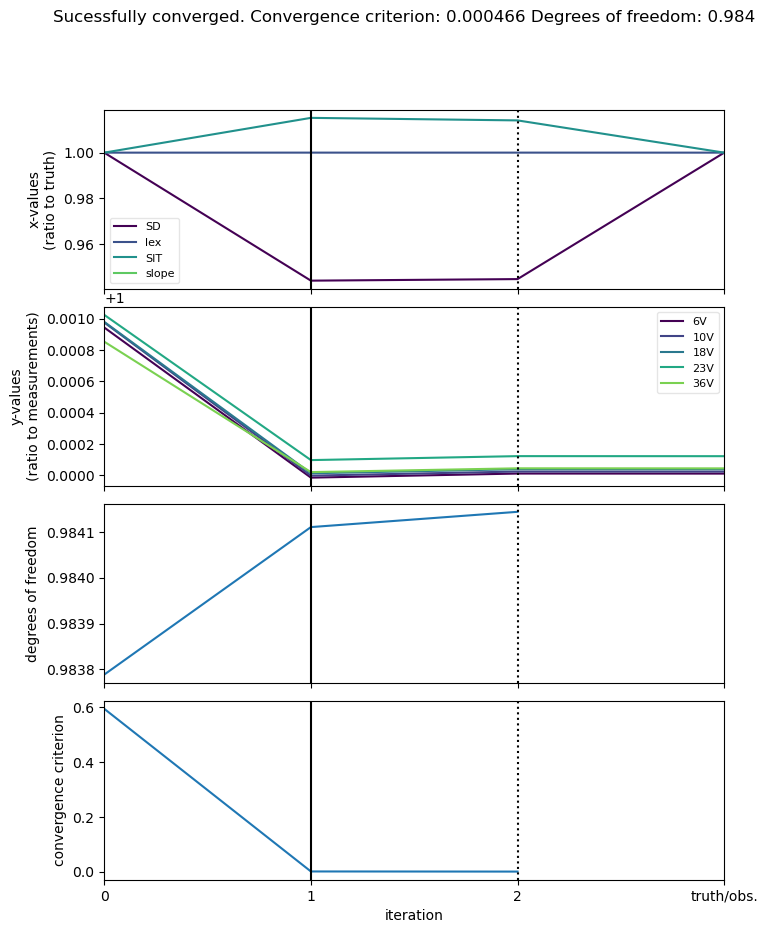

In [15]:
## Iterate over different start guesses

## scale covariance ? and convert to diagonal
try:
    d = np.diag(x_cov)
    x_cov = np.diag(d)
except:
    print('One dimensional marix')
    x_cov = np.array([[x_cov]])

diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, (0.028e-3)**2, (0.2637e-3)**2,
        (319.15e-2)**2, np.std(FYI_data.skt)**2, np.std(FYI_data.sit)**2,(0.005)**2]
#diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, (np.std(FYI_data.sd_lex, axis=0)[0])**2,
#        (np.sum(np.std(FYI_data.sd_sal, axis=0)))**2,(np.std(FYI_data.sd_rho, axis=0)[1])**2,
#        np.std(FYI_data.skt)**2, np.std(FYI_data.sit)**2,(0.005)**2]

diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, (np.std(FYI_data.sd_lex, axis=0)[0])**2,
        (np.sum(np.std(FYI_data.sd_sal, axis=0)))**2,(np.std(FYI_data.sd_rho, axis=0)[1])**2,
        np.std(FYI_data.sit)**2,(0.005)**2]
diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, (np.std(FYI_data.sd_lex, axis=0)[0])**2,
        np.std(FYI_data.sit)**2,(0.005)**2]
x_cov = np.diag(diag)
x_ap[-1]=0.08

## define extra arguments to forward function
nl_snow=2
x_vars = list(x_upperLimit.keys())
print(x_vars)
print(x_ap)
print(x_cov)
forwardKwArgs = {"self":FYI_data,"variables": x_vars, "nl_snow": nl_snow, "n": 0, "pol":polarization
                 , "logarithmic": False, "nls":1, "avg":True, "sim":True}
# define the optimal estimation
oe = pyOE.optimalEstimation(
        x_vars, x_ap, x_cov, y_vars, y_obs, y_cov, forward_OIB
        ,forwardKwArgs=forwardKwArgs
        ,x_lowerLimit=x_lowerLimit
        ,x_upperLimit=x_upperLimit
        ,x_truth=x_truth
        ,convergenceFactor=10
        )
# run the optimization and print outputs
oe.doRetrieval(maxIter=8)
print('-----------------')
print('TRUE VALUES')
print('-----------------')
print('SD: ', np.mean(FYI_data.sd, axis=0))
print('lex: ',np.mean(FYI_data.sd_lex, axis=0)*1e3)
print('sal: ',np.mean(FYI_data.sd_sal, axis=0)*1e3)
print('SIT: ',np.mean(FYI_data.sit))

print('-----------------')
print(oe.x_op)
print((oe.x_op[:1])*1e2)
try:
    print((oe.x_op[1:3])*1e3)
except:
    pass
# print((oe.x_op[3:]))
print('-----------------')
print('Jacobian matrix:\n', oe.getJacobian(oe.x_op, oe.y_op)[0])
oe.plotIterations()

NameError: name 'savepath' is not defined

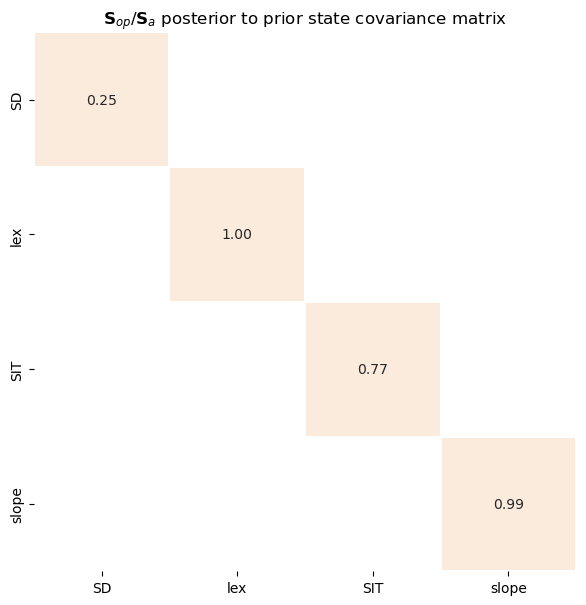

In [16]:
oe_show = makeOEobject(x_vars, x_ap, x_cov, y_vars, y_obs, y_cov, forward_OIB)
covOutMat(oe.S_op, oe_show.S_a)

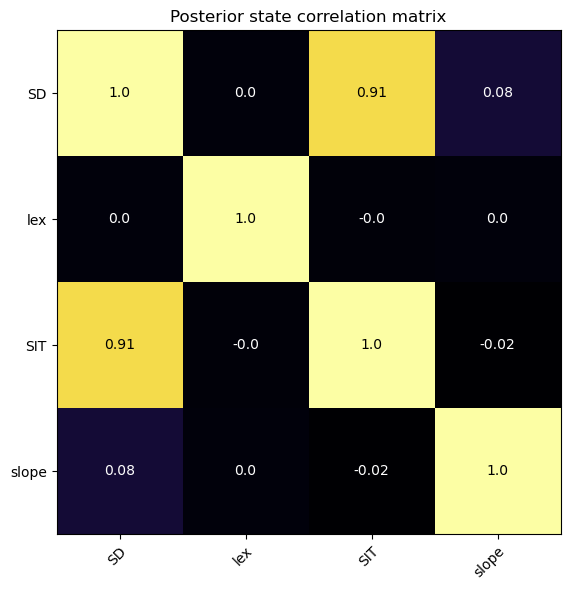

In [17]:
#def corrMat(data):
corrMat = np.zeros(oe.S_op.shape)
sigmas = np.diag(oe.S_op)**(1/2)
rows = range(oe.S_op.shape[0])
cols = range(oe.S_op.shape[1])
for row in rows:
    sigma1 = sigmas[row]
    for col in cols:
        sigma2 = sigmas[col]

        corrMat[row][col] = np.array(oe.S_op)[row][col]/(sigma1*sigma2)




fig, ax = plt.subplots(figsize=(9, 6))
im = ax.imshow(corrMat, cmap="inferno")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(oe.S_op.keys())), labels=oe.S_op.keys())
ax.set_yticks(np.arange(len(oe.S_op.keys())), labels=oe.S_op.keys())

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


# Loop over data dimensions and create text annotations.
for i in range(len(oe.S_op.keys())):
    for j in range(len(oe.S_op.keys())):
        if np.round(corrMat[i, j],2) > 0.5:
            text = ax.text(j, i, np.round(corrMat[i, j],2),
                   ha="center", va="center", color="k")
        else:
            text = ax.text(j, i, np.round(corrMat[i, j],2),
                           ha="center", va="center", color="w")

ax.set_title(r'Posterior state correlation matrix')
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)


fig.tight_layout()
# plt.savefig(savepath + str(slope_std) + '_CorrMatrixOut.png' )
plt.show()


In [ ]:
## calculate angles if we have more than 1 input variable
savepath = "C:/Users/Ida Olsen/Documents/Speciale_2022/figures/reference_results/"
text_file = open(savepath + "angles_jacobian.txt", "w")
if len(input_variables)>1:
    for i in range(len(input_variables)):
        for j in range(len(input_variables)):
            if i!=j:
                calc_ang(input_variables[i], input_variables[j])

### Test for assumptions

In [18]:
linearity, trueLinearityChi2, trueLinearityChi2Crit = oe.linearityTest(significance=0.05)
print('Linearity test passed: ', trueLinearityChi2 < trueLinearityChi2Crit)
chiSquareTest = oe.chiSquareTest(significance=0.05)
print('\nTests passed:\n' ,chiSquareTest[0])

SD       0.105673
lex      0.000140
SIT      1.439828
slope         NaN
dtype: float64
Linearity test passed:  False
Warning. Singular Matrix with rank 2 instead of 5. (This is typically save to ignore)       
Warning. Singular Matrix with rank 2 instead of 4. (This is typically save to ignore)       

Tests passed:
 chi2test
Y_Optimal_vs_Observation    True
Y_Observation_vs_Prior      True
Y_Optimal_vs_Prior          True
X_Optimal_vs_Prior          True
dtype: bool


In [ ]:
np.sum(np.std(FYI_data.sd_rho, axis=0))

[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.00014014]
[[0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.0025]]
1.10 s, iteration 1, degrees of freedom: 0.99 of 4, converged (x-space):  0.277
1.69 s, iteration 2, degrees of freedom: 0.99 of 4, done.  0.000
1.06 s, iteration 1, degrees of freedom: 0.99 of 4, converged (x-space):  0.030
1.52 s, iteration 2, degrees of freedom: 0.99 of 4, done.  0.000
1.04 s, iteration 1, degrees of freedom: 0.99 of 4, converged (x-space):  0.000
1.50 s, iteration 2, degrees of freedom: 0.99 of 4, done.  0.000
1.04 s, iteration 1, degrees of freedom: 0.98 of 4, converged (x-space):  0.000
1.55 s, iteration 2, degrees of freedom: 0.98 of 4, done.  0.000
1.09 s, iteration 1, degrees of freedom: 0.98 of 4, converged (x-space):  0.006
1.57 s, iteration 

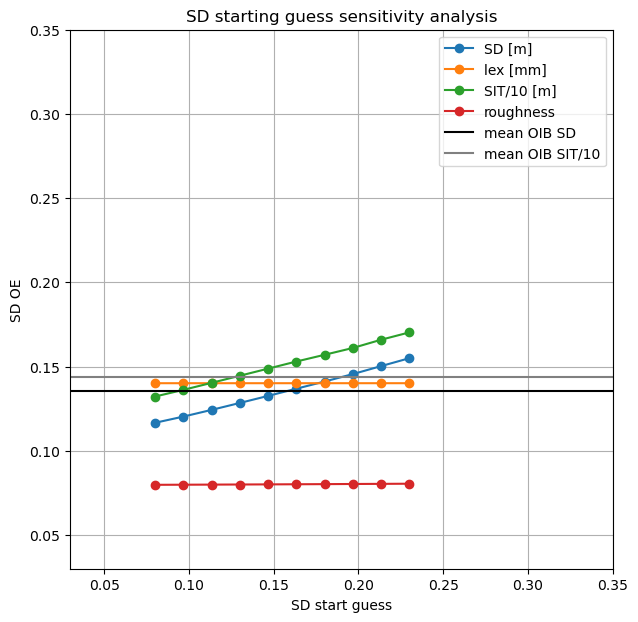

[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.00014014]
[[0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.0025]]
1.07 s, iteration 1, degrees of freedom: 0.98 of 4, converged (x-space):  0.001
1.58 s, iteration 2, degrees of freedom: 0.98 of 4, done.  0.000
1.16 s, iteration 1, degrees of freedom: 0.98 of 4, converged (x-space):  0.001
1.70 s, iteration 2, degrees of freedom: 0.98 of 4, done.  0.000
1.07 s, iteration 1, degrees of freedom: 0.99 of 4, converged (x-space):  0.000
1.58 s, iteration 2, degrees of freedom: 0.99 of 4, done.  0.000
1.11 s, iteration 1, degrees of freedom: 1.00 of 4, converged (x-space):  0.001
1.61 s, iteration 2, degrees of freedom: 1.00 of 4, done.  0.000
1.16 s, iteration 1, degrees of freedom: 1.03 of 4, converged (x-space):  0.001
1.67 s, iteration 

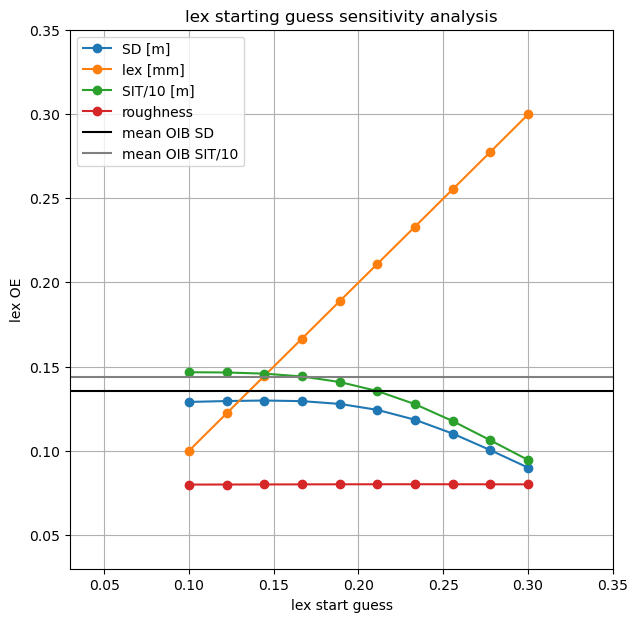

[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.00014014]
[[0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.0025]]
1.16 s, iteration 1, degrees of freedom: 1.01 of 4, not converged (x-space):  1.565
1.72 s, iteration 2, degrees of freedom: 1.00 of 4, converged (x-space):  0.056
2.27 s, iteration 3, degrees of freedom: 1.01 of 4, done.  0.000
1.11 s, iteration 1, degrees of freedom: 1.01 of 4, not converged (x-space):  0.709
1.61 s, iteration 2, degrees of freedom: 1.01 of 4, converged (x-space):  0.013
2.10 s, iteration 3, degrees of freedom: 1.01 of 4, done.  0.000
1.18 s, iteration 1, degrees of freedom: 1.00 of 4, not converged (x-space):  0.476
1.73 s, iteration 2, degrees of freedom: 1.01 of 4, converged (x-space):  0.005
2.23 s, iteration 3, degrees of freedom: 1.01 of 4, done

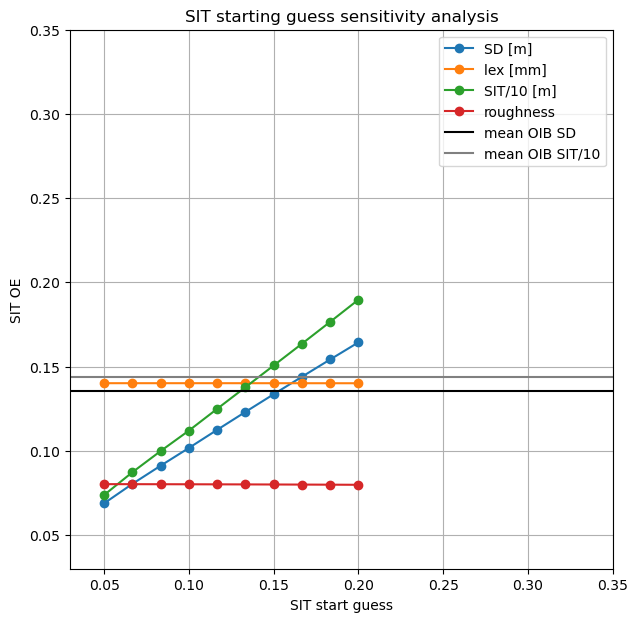

[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.00014014]
[[0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.0025]]
1.11 s, iteration 1, degrees of freedom: 0.98 of 4, converged (x-space):  0.032
1.64 s, iteration 2, degrees of freedom: 0.98 of 4, done.  0.000
1.17 s, iteration 1, degrees of freedom: 0.98 of 4, converged (x-space):  0.018
1.70 s, iteration 2, degrees of freedom: 0.98 of 4, done.  0.000
1.17 s, iteration 1, degrees of freedom: 0.98 of 4, converged (x-space):  0.005
1.70 s, iteration 2, degrees of freedom: 0.98 of 4, done.  0.000
1.13 s, iteration 1, degrees of freedom: 0.98 of 4, converged (x-space):  0.000
1.65 s, iteration 2, degrees of freedom: 0.98 of 4, done.  0.000
1.14 s, iteration 1, degrees of freedom: 0.99 of 4, converged (x-space):  0.000
1.67 s, iteration 

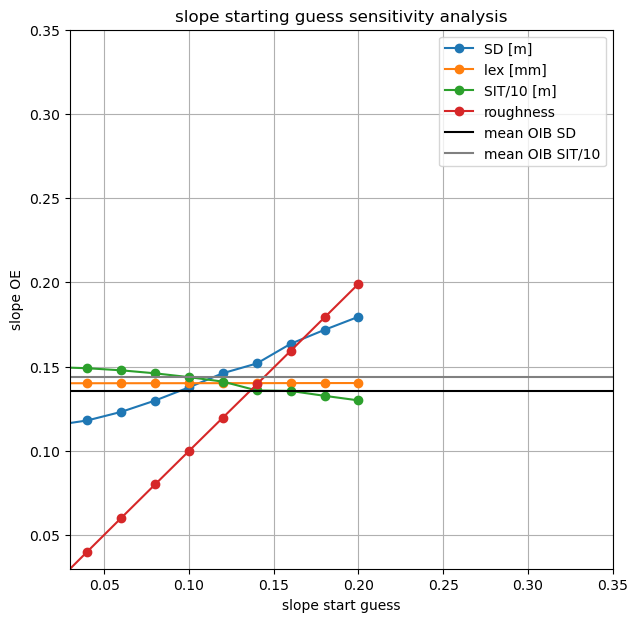

In [19]:
## Iterate over different start guesses (of SD)
savepath = "C:/Users/Ida Olsen/Documents/Speciale_2022/figures/reference_results/"
input_variables = x_vars
logarithmic=False

for var in input_variables:
    [x_ap, x_cov, x_lowerLimit, x_upperLimit, x_info] = prepare_inputs_FYI(FYI_data,x_vars, logarithmic=False, sim=True, nls=1)
    print(x_cov)
    #diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, (np.std(FYI_data.sd_lex, axis=0)[0])**2,
    #        (np.sum(np.std(FYI_data.sd_sal, axis=0)))**2,(np.std(FYI_data.sd_rho, axis=0)[1])**2,
    #        np.std(FYI_data.skt)**2, np.std(FYI_data.sit)**2,(0.005)**2]

    diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, (np.std(FYI_data.sd_lex, axis=0)[0])**2,
            (np.sum(np.std(FYI_data.sd_sal, axis=0)))**2,(np.std(FYI_data.sd_rho, axis=0)[1])**2,
            np.std(FYI_data.sit)**2,(0.005)**2]
    diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, (np.std(FYI_data.sd_lex, axis=0)[0])**2,
            np.std(FYI_data.sit)**2,(0.005)**2]
    x_cov = np.diag(diag)
    x_ap[-1]=0.08
    # x_cov = np.cov(X)

    

    cc = []
    x_op = []
    ind = [i==var for i in input_variables]
    if var=='SD':
        if logarithmic==True:
            V0 = np.linspace(np.log10(0.08), np.log10(0.25), 10)
        else:
            V0 = np.linspace(0.05, 0.20, 10)
    elif var=='lex':
        if logarithmic==True:
            V0 =  np.linspace(np.log10(0.2*1e-3), np.log10(0.4*1e-3), 10)
        else:
            V0 =  np.linspace(0.1*1e-3, 0.3*1e-3, 10)
    elif var=='sal':
        V0 =  np.linspace(2*PSU, 10*PSU, 10)
        # V0 =  np.linspace(np.log10(0.1*PSU), np.log10(2*PSU), 10)
    elif var=='rho':
        V0 = np.linspace(200, 400, 10)
    elif var=='Tsur':
        V0 = np.linspace(249, 256, 10)
    elif var=='SIT':
        V0 = np.linspace(0.5, 2.0, 10)
    elif var=='slope':
        V0 = np.linspace(0.02, 0.2, 10)

    for v0 in V0:
        x_ap[ind] =v0
        ## define extra arguments to forward function
        forwardKwArgs = {"self":FYI_data,"variables": x_vars, "nl_snow": nl_snow, "n": 0, "pol":polarization
                         , "logarithmic": False, "nls":1, "avg":True, "sim":True}
        # define the optimal estimation
        oe = pyOE.optimalEstimation(
                x_vars, x_ap, x_cov, y_vars, y_obs, y_cov, forward_OIB
                ,forwardKwArgs=forwardKwArgs
                ,x_lowerLimit=x_lowerLimit
                ,x_upperLimit=x_upperLimit
                ,x_truth=x_truth
                ,convergenceFactor=10
                )

        try:
            # run the optimization and print outputs
            oe.doRetrieval(maxIter=6)
            oe.plotIterations
            cc.append(oe.S_op)
            x_op.append(oe.x_op)
        except:
            print('NC')
            V0 = np.delete(V0, [np.where(V0==v0)])
        
    ## Plot results
    plt.figure(figsize=(7,7))
    # print(var)
    for i in range(len(input_variables)):
        print(i)
        
        if input_variables[i]!="SIT" and input_variables[i]!="rho" and input_variables[i]!="sal" and input_variables[i]!="slope" and logarithmic==True:
            V = [10**x[input_variables[i]] for x in x_op if ~np.isnan(x).any()]
        else:
            V = [x[input_variables[i]] for x in x_op if ~np.isnan(x).any()]
        if var!="SIT" and var!="rho" and var!="sal" and var!='slope' and logarithmic==True:
            VV0 = [10**v0 for v0,x in zip(V0, x_op) if ~np.isnan(x).any()]
        else:
            VV0 = [v0 for v0,x in zip(V0, x_op) if ~np.isnan(x).any()]
        if input_variables[i]=="lex" or input_variables[i]=="sal":
            V = np.array(V)*1e3
        if var=="lex" or var=="sal":
            VV0 = np.array(VV0)*1e3
        if var=="sal":
            VV0 = VV0/50
            print(VV0)
        if var=="SD":
            VV0 = np.array(VV0)+0.03
            print(VV0)
        if input_variables[i]=="sal":
            V=V/50
            label = "sal/50 [PSU]"
        if input_variables[i]=="lex":
            label = "lex [mm]"
        if input_variables[i]=="SD":
            V=np.array(V)+0.03
            print(V)
            label = "SD [m]"
        if var=='rho' or var=='Tsur':
            VV0 = np.array(VV0)/1000
        if input_variables[i]=="rho":
            V = np.array(V)/1000
            label = "rho [g/cm3]"
        if input_variables[i]=="Tsur":
            V = np.array(V)/1000
            label = "Tsur/1000 [K]"
        if var=="SIT":
            VV0 = np.array(VV0)/10
        if input_variables[i]=="SIT":
            V=np.array(V)/10
            label = "SIT/10 [m]"
        if input_variables[i]=="slope":
            # V=np.array(V)/10
            label = "roughness"
        # print(VV0)
        # print(V)
        plt.plot(VV0, V, '-o', label=label)#input_variables[i])
    # print(np.mean(10**FYI_data.sd))
    plt.xlabel(var + ' start guess')
    plt.ylabel(var +' OE')
    if logarithmic==True:
        plt.axhline(np.mean(10**FYI_data.sd), color='k', label='mean OIB SD')
    else:
        plt.axhline(np.mean(np.sum(FYI_data.sd, axis=1)), color='k', label='mean OIB SD')
    plt.axhline(np.mean(FYI_data.sit)/10, color='grey', label='mean OIB SIT/10')
    if "Tsur" in var:
        plt.xlim([0.2, 0.3])
        #plt.ylim([0.04, 0.41])
    else:
        # plt.xlim([0.04, 0.41])
        plt.xlim([0.03, 0.35])
    plt.ylim([0.03, 0.35]) #0.41])
    plt.legend()
    plt.grid()
    plt.title(var + ' starting guess sensitivity analysis')
    plt.savefig(savepath + var + 'V_knowTsur'+'.png' )
    plt.show()

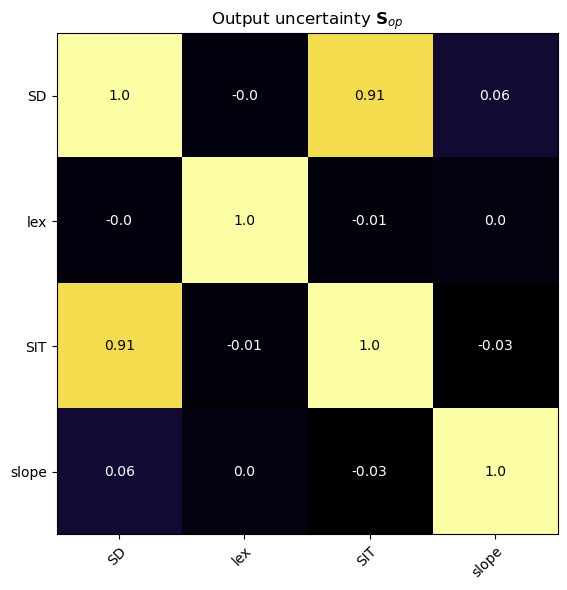

In [20]:
#def corrMat(data):
corrMat = np.zeros(oe.S_op.shape)
sigmas = np.diag(oe.S_op)**(1/2)
rows = range(oe.S_op.shape[0])
cols = range(oe.S_op.shape[1])
for row in rows:
    sigma1 = sigmas[row]
    for col in cols:
        sigma2 = sigmas[col]
        
        corrMat[row][col] = np.array(oe.S_op)[row][col]/(sigma1*sigma2)

        
        
 
fig, ax = plt.subplots(figsize=(9, 6))
im = ax.imshow(corrMat, cmap="inferno")

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(oe.S_op.keys())), labels=oe.S_op.keys())
ax.set_yticks(np.arange(len(oe.S_op.keys())), labels=oe.S_op.keys())

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


# Loop over data dimensions and create text annotations.
for i in range(len(oe.S_op.keys())):
    for j in range(len(oe.S_op.keys())):
        if np.round(corrMat[i, j],2) > 0.5:
            text = ax.text(j, i, np.round(corrMat[i, j],2),
                   ha="center", va="center", color="k")
        else:
            text = ax.text(j, i, np.round(corrMat[i, j],2),
                           ha="center", va="center", color="w")

ax.set_title(r'Output uncertainty $\mathbf{S}_{op}$')
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)


fig.tight_layout()
# plt.savefig(savepath + 'CorrMatrixOut.png' )
plt.show()

In [ ]:
x_cov

In [31]:
# ns = 200
ns = len(FYI_data.skt)
[x_ap, x_cov, x_lowerLimit, x_upperLimit, x_info] = prepare_inputs_FYI(FYI_data,x_vars, logarithmic=False, sim=True, nls=1)

#diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, (0.028e-3)**2, (0.2637e-3)**2, (319.15e-2)**2, (0.03)**2]
# diag = [(4.8e-2)**2, (0.028e-3)**2, (0.2637e-3)**2, (319.15e-2)**2, (30.0e-2)**2, (0.03)**2]
diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, (np.std(FYI_data.sd_lex, axis=0)[0])**2,
        np.std(FYI_data.sit)**2,(0.005)**2]
diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, np.std(FYI_data.sit)**2]
x_cov = np.diag(diag)
# x_cov = np.cov(X)
#print(x_cov)
#x_cov[-1,-1] = (0.005)**2
#x_ap[-1]=0.08
#diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, (np.std(FYI_data.sd_lex, axis=0)[0])**2,
#        (np.sum(np.std(FYI_data.sd_sal, axis=0)))**2,(np.std(FYI_data.sd_rho, axis=0)[1])**2,
#        np.std(FYI_data.skt)**2, np.std(FYI_data.sit)**2,(0.005)**2]

#diag = [np.std(np.sum(FYI_data.sd, axis=1))**2, (np.std(FYI_data.sd_lex, axis=0)[0])**2,
#        (np.sum(np.std(FYI_data.sd_sal, axis=0)))**2,(np.std(FYI_data.sd_rho, axis=0)[1])**2,
#        np.std(FYI_data.sit)**2,(0.005)**2]
#x_cov = np.diag(diag)
#try:
#    # x_cov[0,0]=x_cov[0,0]*5
#    d = np.diag(x_cov)
#    x_cov = np.diag(d)
#except:
#    print('One dimensional marix')
#    x_cov = np.array([[x_cov]])

def do_OE_sim(ns, noise=False):
    if polarization=='both':
        data=zip(FYI_data.TbV_sim[:ns], FYI_data.TbH_sim[:ns])
    elif polarization=='V':
        data=FYI_data.TbV_sim[:ns]
    results = []
    x_optimals = []
    nn = [i for i in range(ns)]
    no = []
    for Tb, n in zip(data, range(len(FYI_data.skt[:ns]))):
        print('Point number: ', n)
        forwardKwArgs = {"self":FYI_data, "variables": x_vars, "nl_snow": 2, "n": n, "pol":polarization
                         , "logarithmic": False, "nls":1, "avg":False, "sim":True}
        # define the optimal estimation
        y_obs = np.array(Tb).flatten()
        # print(y_obs)
        oe = pyOE.optimalEstimation(
                x_vars, x_ap, x_cov, y_vars, y_obs, y_cov, forward_OIB
                ,forwardKwArgs=forwardKwArgs
                ,x_lowerLimit=x_lowerLimit
                ,x_upperLimit=x_upperLimit
                ,convergenceFactor=10
                )
        try:
            oe.doRetrieval(maxIter=5)
            x_optimals.append(oe.x_op)
            results.append(oe.y_op)
        except:
            print('Convergence not reached')
            nn.remove(n)
            no.append(n)
    return [nn, no, x_optimals, results]

[nn, no, x_optimals, results] = do_OE_sim(ns)

[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
[0.08159524 0.00924204 0.18793142 0.03643294]
Point number:  0
0.64 s, iteration 1, degrees of freedom: 0.99 of 2, not converged (x-space):  0.231
0.92 s, iteration 2, degrees of freedom: 0.99 of 2, converged (x-space):  0.000
1.24 s, iteration 3, degrees of freedom: 0.99 of 2, done.  0.000
Point number:  1
0.67 s, iteration 1, degrees of freedom: 0.99 of 2, converged (x-space):  0.025
0.95 s, iteration 2, degrees of freedom: 0.99 of 2, done.  0.000
Point number:  2
0.68 s, iteration 1, degrees of freedom: 0.99 of 2, converged (x-space):  0.151
0.98 s, iteration 2, degrees of freedom: 0.99 of 2, done.  0.000
Point number:  3
0.70 s, iteration 1, degrees of freedom: 0.99 of 2, converged (x-space):  0.076
1.01 s, iteration 2, degrees of freedom: 0.99 of 2, done.  0.000
Point number:  4
0.70 s, iteration 1, degrees of freedom: 0.99 of 2, converged (x-sp

0.69 s, iteration 1, degrees of freedom: 0.98 of 2, converged (x-space):  0.097
1.01 s, iteration 2, degrees of freedom: 0.98 of 2, done.  0.000
Point number:  47
0.71 s, iteration 1, degrees of freedom: 0.98 of 2, converged (x-space):  0.003
1.01 s, iteration 2, degrees of freedom: 0.98 of 2, done.  0.000
Point number:  48
0.71 s, iteration 1, degrees of freedom: 0.98 of 2, converged (x-space):  0.001
1.02 s, iteration 2, degrees of freedom: 0.98 of 2, done.  0.000
Point number:  49
0.73 s, iteration 1, degrees of freedom: 0.99 of 2, not converged (x-space):  1.247
1.04 s, iteration 2, degrees of freedom: 0.99 of 2, converged (x-space):  0.004
1.33 s, iteration 3, degrees of freedom: 0.99 of 2, done.  0.000
Point number:  50
0.74 s, iteration 1, degrees of freedom: 0.99 of 2, converged (x-space):  0.094
1.04 s, iteration 2, degrees of freedom: 0.99 of 2, done.  0.000
Point number:  51
0.71 s, iteration 1, degrees of freedom: 0.99 of 2, converged (x-space):  0.121
1.01 s, iteration 2, 

0.75 s, iteration 1, degrees of freedom: 0.97 of 2, converged (x-space):  0.001
1.04 s, iteration 2, degrees of freedom: 0.97 of 2, done.  0.000
Point number:  94
0.76 s, iteration 1, degrees of freedom: 0.98 of 2, converged (x-space):  0.019
1.08 s, iteration 2, degrees of freedom: 0.98 of 2, done.  0.000
Point number:  95
0.78 s, iteration 1, degrees of freedom: 0.98 of 2, converged (x-space):  0.099
1.12 s, iteration 2, degrees of freedom: 0.98 of 2, done.  0.000
Point number:  96
0.76 s, iteration 1, degrees of freedom: 0.98 of 2, converged (x-space):  0.000
1.06 s, iteration 2, degrees of freedom: 0.98 of 2, done.  0.000
Point number:  97
0.76 s, iteration 1, degrees of freedom: 0.99 of 2, converged (x-space):  0.010
1.07 s, iteration 2, degrees of freedom: 0.99 of 2, done.  0.000
Point number:  98
0.73 s, iteration 1, degrees of freedom: 0.99 of 2, converged (x-space):  0.030
1.06 s, iteration 2, degrees of freedom: 0.99 of 2, done.  0.000
Point number:  99
0.75 s, iteration 1, d

1.36 s, iteration 3, degrees of freedom: 0.98 of 2, done.  0.000
Point number:  141
0.73 s, iteration 1, degrees of freedom: 0.99 of 2, not converged (x-space):  2.257
1.03 s, iteration 2, degrees of freedom: 0.99 of 2, converged (x-space):  0.010
1.31 s, iteration 3, degrees of freedom: 0.99 of 2, done.  0.000
Point number:  142
0.75 s, iteration 1, degrees of freedom: 0.99 of 2, not converged (x-space):  1.047
1.07 s, iteration 2, degrees of freedom: 0.99 of 2, converged (x-space):  0.003
1.40 s, iteration 3, degrees of freedom: 0.99 of 2, done.  0.000
Point number:  143
0.73 s, iteration 1, degrees of freedom: 0.99 of 2, not converged (x-space):  0.586
1.02 s, iteration 2, degrees of freedom: 0.99 of 2, converged (x-space):  0.001
1.34 s, iteration 3, degrees of freedom: 0.99 of 2, done.  0.000
Point number:  144
0.75 s, iteration 1, degrees of freedom: 0.99 of 2, not converged (x-space):  4.474
1.06 s, iteration 2, degrees of freedom: 1.00 of 2, converged (x-space):  0.026
1.36 s, 

1.37 s, iteration 3, degrees of freedom: 0.98 of 2, done.  0.000
Point number:  180
0.78 s, iteration 1, degrees of freedom: 0.99 of 2, not converged (x-space):  3.344
1.10 s, iteration 2, degrees of freedom: 0.99 of 2, converged (x-space):  0.019
1.42 s, iteration 3, degrees of freedom: 0.99 of 2, done.  0.000
Point number:  181
0.77 s, iteration 1, degrees of freedom: 0.99 of 2, not converged (x-space):  3.989
1.08 s, iteration 2, degrees of freedom: 0.99 of 2, converged (x-space):  0.025
1.40 s, iteration 3, degrees of freedom: 0.99 of 2, done.  0.000
Point number:  182
0.77 s, iteration 1, degrees of freedom: 0.99 of 2, not converged (x-space):  6.452
1.10 s, iteration 2, degrees of freedom: 0.99 of 2, converged (x-space):  0.054
1.45 s, iteration 3, degrees of freedom: 0.99 of 2, done.  0.000
Point number:  183
0.78 s, iteration 1, degrees of freedom: 0.99 of 2, not converged (x-space):  2.036
1.10 s, iteration 2, degrees of freedom: 0.99 of 2, converged (x-space):  0.009
1.42 s, 

0.79 s, iteration 1, degrees of freedom: 0.98 of 2, converged (x-space):  0.039
1.13 s, iteration 2, degrees of freedom: 0.98 of 2, done.  0.000
Point number:  226
0.76 s, iteration 1, degrees of freedom: 0.98 of 2, converged (x-space):  0.013
1.11 s, iteration 2, degrees of freedom: 0.98 of 2, done.  0.000
Point number:  227
0.82 s, iteration 1, degrees of freedom: 0.98 of 2, converged (x-space):  0.066
1.18 s, iteration 2, degrees of freedom: 0.98 of 2, done.  0.000
Point number:  228
0.77 s, iteration 1, degrees of freedom: 0.97 of 2, converged (x-space):  0.001
1.12 s, iteration 2, degrees of freedom: 0.97 of 2, done.  0.000
Point number:  229
0.80 s, iteration 1, degrees of freedom: 0.97 of 2, converged (x-space):  0.009
1.16 s, iteration 2, degrees of freedom: 0.97 of 2, done.  0.000
Point number:  230
0.82 s, iteration 1, degrees of freedom: 0.97 of 2, converged (x-space):  0.000
1.16 s, iteration 2, degrees of freedom: 0.97 of 2, done.  0.000
Point number:  231
0.74 s, iteratio

1.08 s, iteration 2, degrees of freedom: 0.95 of 2, done.  0.000
Point number:  274
0.76 s, iteration 1, degrees of freedom: 0.95 of 2, converged (x-space):  0.000
1.07 s, iteration 2, degrees of freedom: 0.95 of 2, done.  0.000
Point number:  275
0.78 s, iteration 1, degrees of freedom: 0.95 of 2, converged (x-space):  0.000
1.11 s, iteration 2, degrees of freedom: 0.95 of 2, done.  0.000
Point number:  276
0.76 s, iteration 1, degrees of freedom: 0.96 of 2, converged (x-space):  0.001
1.09 s, iteration 2, degrees of freedom: 0.96 of 2, done.  0.000
Point number:  277
0.73 s, iteration 1, degrees of freedom: 0.96 of 2, converged (x-space):  0.004
1.08 s, iteration 2, degrees of freedom: 0.96 of 2, done.  0.000
Point number:  278
0.73 s, iteration 1, degrees of freedom: 1.00 of 2, converged (x-space):  0.001
1.03 s, iteration 2, degrees of freedom: 1.00 of 2, done.  0.000
Point number:  279
0.71 s, iteration 1, degrees of freedom: 0.99 of 2, converged (x-space):  0.012
1.11 s, iteratio

1.08 s, iteration 2, degrees of freedom: 0.94 of 2, done.  0.000
Point number:  319
0.77 s, iteration 1, degrees of freedom: 0.94 of 2, converged (x-space):  0.002
1.11 s, iteration 2, degrees of freedom: 0.94 of 2, done.  0.000
Point number:  320
0.74 s, iteration 1, degrees of freedom: 0.95 of 2, converged (x-space):  0.000
1.06 s, iteration 2, degrees of freedom: 0.95 of 2, done.  0.000
Point number:  321
0.73 s, iteration 1, degrees of freedom: 0.95 of 2, converged (x-space):  0.001
1.05 s, iteration 2, degrees of freedom: 0.95 of 2, done.  0.000
Point number:  322
0.73 s, iteration 1, degrees of freedom: 0.96 of 2, converged (x-space):  0.003
1.06 s, iteration 2, degrees of freedom: 0.96 of 2, done.  0.000
Point number:  323
0.77 s, iteration 1, degrees of freedom: 0.97 of 2, converged (x-space):  0.017
1.10 s, iteration 2, degrees of freedom: 0.97 of 2, done.  0.000
Point number:  324
0.73 s, iteration 1, degrees of freedom: 0.96 of 2, converged (x-space):  0.025
1.06 s, iteratio

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

def RMSE(y_actual, y_predicted):
    MSE = mean_squared_error(y_actual, y_predicted)
    RMSE = math.sqrt(MSE)
    
    print("Root Mean Square Error:")
    print(RMSE)
    return RMSE

def MAE(y_actual, y_predicted):
    MAE = mean_absolute_error(y_actual, y_predicted)
    
    print("Mean Absolute Error:")
    print(MAE)
    return MAE

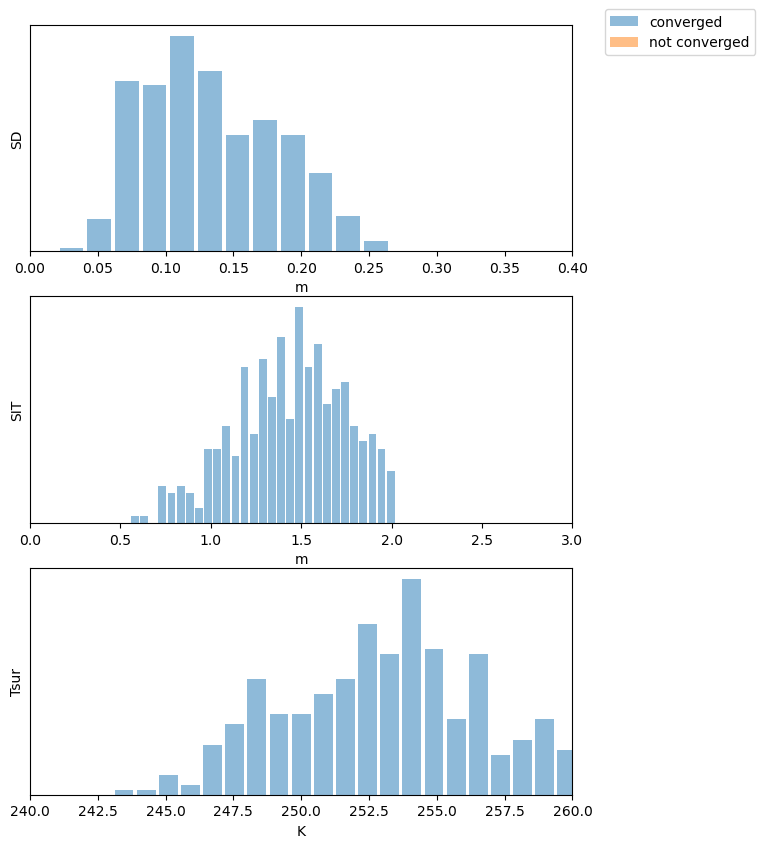

In [33]:
nn  = np.array(nn, dtype=int)
no  = np.array(no, dtype=int)

fig, ax = plt.subplots(3, figsize=(7,10), sharex=False)

vars = ['SD', 'SIT', 'Tsur']
xlabel = ['m', 'm','K']
xlim = [[0,0.4], [0,3], [240, 260]]
binss = [np.linspace(0, 1, 50), np.linspace(0, 5, 100), np.linspace(230, 270, 50)]
# bins = 
for var, i in zip([np.sum(FYI_data.sd, axis=1), FYI_data.sit, FYI_data.skt], range(3)):
    bins = binss[i]
    ax[i].hist(var[nn], bins=bins, rwidth=0.85, alpha=0.5, label = 'converged')
    ax[i].hist(var[no], bins=bins, rwidth=0.85, alpha=0.5, label='not converged')
    ax[i].set_yticks([])
    ax[i].set_ylabel(str(vars[i]))
    ax[i].set_xlabel(xlabel[i])
    ax[i].set_xlim(xlim[i])
plt.legend(bbox_to_anchor=(1.35, 3.5))

['SD', 'SIT']


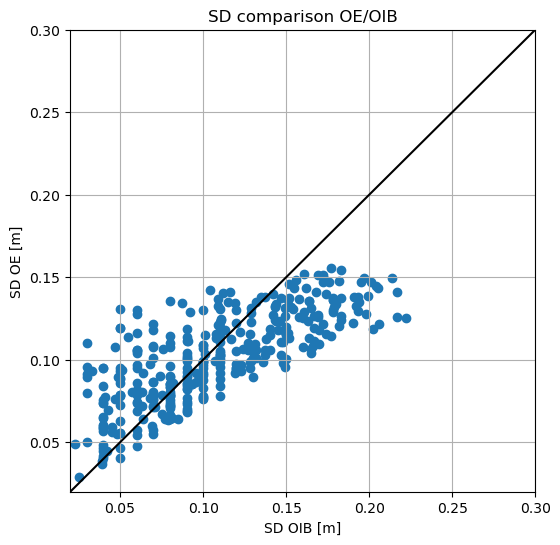

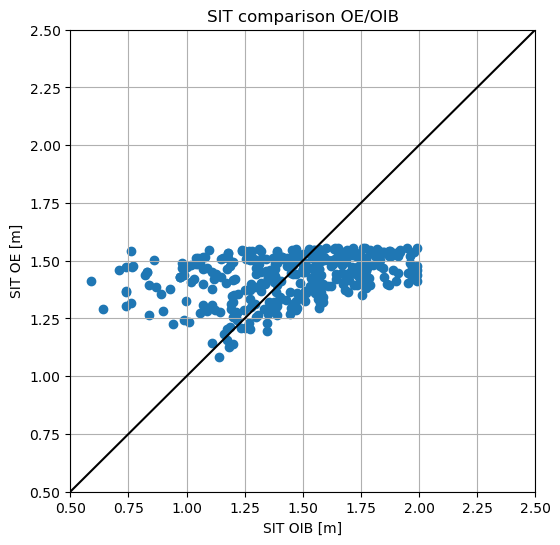

In [34]:
def plot_idv(variables, OIB_data, nn):

   
    for var, data in zip(variables, OIB_data): 
        OE = []
        OIB = []
        #set limits
        for x_optim, n in zip(x_optimals, nn):
            try:
                if var=='SD' or var=='sal' or var=='lex':
                    # convert from log to linear units
                    OE.append(x_optim[var])
                else:
                    OE.append(x_optim[var])
                OIB.append(data[n])
            except:
                pass
                # print('convergence was not reached at: ', x_optim)
        
        if var=='SD' or var=='lex':
            OIB = np.array(OIB)[:,0]
        elif var=='rho' or var=='sal':
            OIB = np.array(OIB)[:,1]
        
        #print(np.shape(OIB))
        #print(np.shape(OE))
        if var=='SD':
            xlim = [0.02, 0.3]
            x = 0.1
            y = 0.25
            unit = ' [m]'
        elif var=='sal':
            xlim = [0.5, 2.0]
            unit = ' [PSU]'
            OIB = OIB*1e3
            x = 0.8
            y = 1.9
            OE = np.array(OE)*1e3
        elif var=='lex':
            xlim = [0.15, 0.3]
            unit = ' [mm]'
            x = 0.18
            y = 0.28
            OIB = OIB*1e3
            OE = np.array(OE)*1e3
        elif var=='Tsur':
            #print(OIB)
            #print(OE)
            xlim = [245, 265]
            x = 250
            y = 250
            unit = ' [K]'
        elif var=='SIT':
            xlim = [0.5, 2.5]
            x = 0.75
            y = 2.25
            unit = ' [m]'
        
        diag = np.linspace(0,400,400)
        
        if var=='SD' or var=='SIT' or var=='Tsur':
            plt.figure(figsize=(6,6))
            plt.scatter(OIB, OE)
            plt.plot(diag, diag, 'k')
            plt.grid()
            plt.title(var + ' comparison OE/OIB')
            plt.xlabel(var + ' OIB' + unit)
            plt.ylabel(var + ' OE' + unit)
            plt.xlim(xlim)
            # square plot
            plt.ylim(xlim)
            # RMSE(OIB, OE)
            #MAE(OIB, OE)
            #plt.text(x, y, 'RMSE: ' + str(np.round(RMSE(OIB, OE),3)) + ' , STD:' + str(np.round(np.std(OIB),3)))
            plt.savefig(savepath + var + '_idv_V_SDSIT.png' )
            plt.show()



# take nn of each
OIB_data = []
print(input_variables)
if 'SD' in input_variables:
    OIB_data.append(FYI_data.sd)
if 'lex' in input_variables:
    OIB_data.append(FYI_data.sd_lex)
if 'sal' in input_variables:
    OIB_data.append(FYI_data.sd_sal)
if 'rho' in input_variables:
    OIB_data.append(FYI_data.sd_rho)
if 'Tsur' in input_variables:
    OIB_data.append(FYI_data.skt)
if 'SIT' in input_variables:
    OIB_data.append(FYI_data.sit)
plot_idv(input_variables, OIB_data, nn)

['SD', 'SIT']


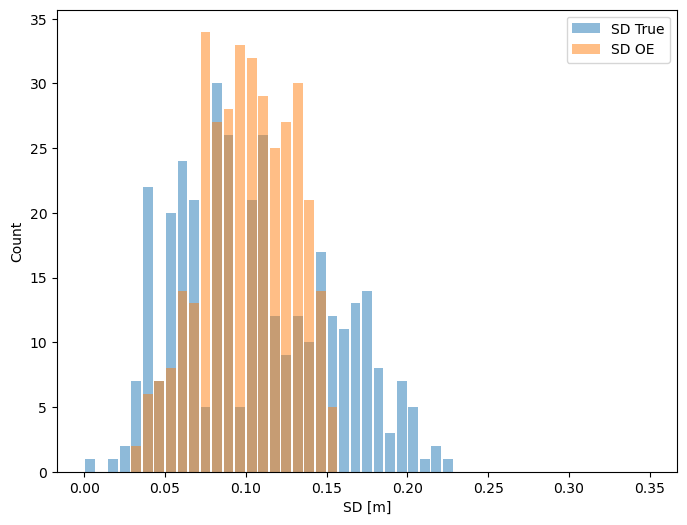

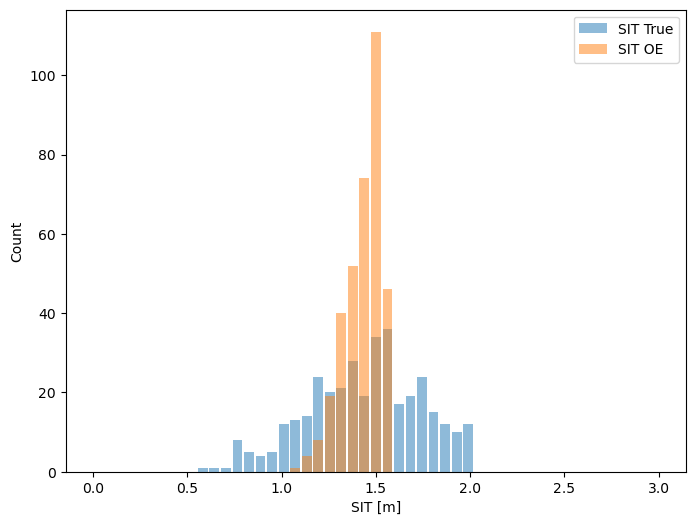

In [35]:
def hist_idv(variables, OIB_data, nn):

   
    for var, data in zip(variables, OIB_data): 
        OE = []
        OIB = []
        #set limits
        try:
            for x_optim, n in zip(x_optimals, nn):
                    OE.append(x_optim[var])
                    OIB.append(data[n])
        except:
            pass
            # print('convergence was not reached at: ', x_optim)
        
        if var=='SD' or var=='lex':
            OIB = np.array(OIB)[:,0]
        elif var=='rho' or var=='sal':
            OIB = np.array(OIB)[:,1]
        
        if var=='SD':
            bins = np.linspace(0, 0.35, 50)
            unit = ' [m]'
        elif var=='sal':
            OE = np.array(OE)*1e3
            OIB = np.array(OIB)*1e3
            bins = np.linspace(5, 15, 50)
            unit = ' [PSU]'
        elif var=='rho':
            bins = np.linspace(320, 370, 50)
            unit = ' [kg/m3]'
        elif var=='lex':
            OE = np.array(OE)*1e3
            OIB = np.array(OIB)*1e3
            bins = np.linspace(0.1, 0.2, 50)
            unit = ' [mm]'
        elif var=='Tsur':
            unit = ' [K]'
            bins = np.linspace(200, 300, 50)
        elif var=='SIT':
            bins = np.linspace(0, 3, 50)
            unit = ' [m]'
        elif var=='slope':
            bins = np.linspace(0, 0.25, 50)
            unit = ' '
        plt.figure(figsize=(8,6))
        plt.hist(OIB, bins=bins,alpha=0.5,rwidth=0.85, label = var + ' True')
        plt.hist(OE, bins=bins, alpha=0.5,rwidth=0.85, label = var + ' OE')
        plt.legend(loc='upper right')
        plt.xlabel(var + unit)
        # plt.grid()
        plt.ylabel('Count')
        plt.savefig(savepath + var + '_hist_idv_V_SDSIT.png',bbox_inches='tight')
        plt.show()




# take nn of each
OIB_data = []
print(input_variables)
if 'SD' in input_variables:
    OIB_data.append(FYI_data.sd)
if 'lex' in input_variables:
    OIB_data.append(FYI_data.sd_lex)
if 'sal' in input_variables:
    OIB_data.append(FYI_data.sd_sal)
if 'rho' in input_variables:
    OIB_data.append(FYI_data.sd_rho)
if 'Tsur' in input_variables:
    OIB_data.append(FYI_data.skt)
if 'SIT' in input_variables:
    OIB_data.append(FYI_data.sit)
if 'slope' in input_variables:
    OIB_data.append(np.array([0.08 for s in FYI_data.sit]))
hist_idv(input_variables, OIB_data, nn)

In [ ]:
savepath

In [ ]:
savepath = "C:/Users/Ida Olsen/Documents/Speciale_2022/figures/reference_results/"